## Perceptron Binary Classification Learning Algorithm

__Perceptron Learning is a simple and easy learning algorithm, that it can solve binary class linear classification problems.__

- __Hypothesis :__
$$
h(x)\ =\ sign(\sum_{i=1}^{N}w_ix_i-threshold)\\ =\ sign(\sum_{i=1}^{N}w_ix_i)+\underbrace{(-threshold)(+1)}_{\text{$w_0x_0$}}\\ = sign(\sum_{i=0}^{N}w_ix_i)\\ = sign(W^TX)
$$


- __Update Parameter :__
 
 1.Find a mistake of $w_t$ called $(x_n(t), y_n(t))$
 
 $$ sign(w_{t}^{T}x_n(t))\ \neq\ y_n(t)$$
 
 2.(try to)correct the mistake by
 
 $$ w_{t+1}\ \leftarrow \ w_{t}\ +\ y_n(t)x_n(t)$$
    

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

 __Use Iris dataset as an example.__

In [2]:
iris = datasets.load_iris()
iris_data = np.append(iris.data, iris.target.reshape(len(iris.data), 1), axis = 1)
col_names = np.append(iris.feature_names, 'target')
iris_data = pd.DataFrame(data = iris_data, columns = col_names)
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


__Select variable and target class.__

In [3]:
def select_data(data, variable, class_set, target_class):
    target_name = {
    0: 'setosa',
    1: "versicolor",
    2: 'virginica'}

    data['target_names'] = data['target'].map(target_name)
    subset = data[(data['target_names'] == class_set[0])| (data['target_names'] == class_set[1])] # filter row data
    subset = subset[[variable[0], variable[1], 'target_names']] # choose variable
    subset.index = list(range(len(subset)))  # reset data index
    subset['target_class'] = subset['target_names'].map(target_class) # target name -> target class
    subset.index = range(len(subset))
    
    return subset

__Set the class label to 1 and -1, it can that PLA to be easy work.__

In [4]:
target_class = {
    'setosa': 1,
    "versicolor":-1
}

subset_iris = select_data(data = iris_data, variable = ['sepal length (cm)', 'petal length (cm)'],
                         class_set = ['setosa', 'versicolor'], target_class = target_class)

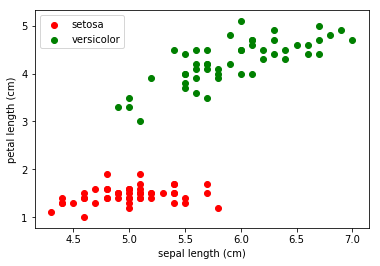

In [5]:
def vis_data(data, x_var, y_var):
    num = 0
    for target in set(data['target_names']):
        x = data[data['target_names'] == target][x_var]
        y = data[data['target_names'] == target][y_var]
        plt.scatter(x, y, label = target, c = ['r', 'g', 'b'][num])
        num += 1
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.legend()
    plt.show()
    
vis_data(data = subset_iris, x_var = 'sepal length (cm)', y_var = 'petal length (cm)')

In [6]:
final_iris = subset_iris.drop(labels = 'target_names', axis = 1)
final_iris.head(3)

,sepal length (cm),petal length (cm),target_class
0,5.1,1.4,1
1,4.9,1.4,1
2,4.7,1.3,1


__Data spliting__

In [7]:
def data_split(data, split_ratio, rand_seed, target_variable):
    np.random.seed(seed = rand_seed)
    sample_index = np.random.choice(data.index, size = int(np.ceil(len(data)*split_ratio)), replace = False)
    
    training_data = data.iloc[sample_index, :]
    training_data.index = range(len(training_data))
    
    testing_data = data.drop(labels = sample_index)
    testing_data.index = range(len(testing_data))
    
    training_x,  training_y = training_data.drop(columns = target_variable).as_matrix(), training_data[target_variable].values
    testing_x,  testing_y = testing_data.drop(columns = target_variable).as_matrix(), testing_data[target_variable].values
    
    return {'training': {"x": training_x, "y": training_y}, "testing": {"x": testing_x, "y": testing_y}}

split_data = data_split(data = final_iris, split_ratio = 0.8, rand_seed = 123, target_variable = "target_class")
training_x, training_y = split_data['training']['x'], split_data['training']['y']
testing_x, testing_y = split_data['testing']['x'], split_data['testing']['y']

In [8]:
class Perceptron:
    def __init__(self):
        pass
    def __adding_bias(self, x):
        x = np.column_stack(tup = (np.ones(len(x)).reshape(len(x), 1), x)) # intercept put on the first columns
        return x
    def training(self, x, y, max_iter = None): 
        x = self.__adding_bias(x)
        y = y
        
        w = np.zeros(x.shape[1])
        self.error_history = list()
        self.training_history = list()
        self.epoch, self.num_iteration = 0, 0 # initialize epoch and num_iteration
        
        while True:
            error = 0
            if max_iter == None:
                self.epoch += 1
                for j in range(len(x)):
                    if np.sign(np.dot(w, x[j, :])) != y[j]:
                        error += 1
                        self.num_iteration += 1
                        w += y[j]*x[j, :]  # update parameter
                        self.training_history.append(w.tolist())
                self.error_history.append(error)
                if error == 0:
                    self.model_parameter = w
                    break 
            else:
                if max_iter > self.num_iteration: 
                    self.epoch += 1
                    for j in range(len(x)):
                        if np.sign(np.dot(w, x[j, :])) != y[j]:
                            error += 1
                            self.num_iteration += 1
                            w += y[j]*x[j, :] # update parameter
                            self.training_history.append(w.tolist())
                    self.error_history.append(error)
                    if error == 0:
                        self.model_parameter = w
                        break 
                else:
                    self.model_parameter = w
                    break
    def predict(self, testing_x):
        bias, w = self.model_parameter[0], self.model_parameter[1:]
        predict = np.sign(np.dot(w, testing_x.T) + bias)
        return predict
    def accuracy(self, prediction, testing_y):
        acc = sum(prediction == testing_y)/len(prediction)
        print('Accuracy : %.2f' % (acc))
        return acc

In [9]:
PLA = Perceptron()
PLA.training(x = training_x, y = training_y, max_iter = 1000) 

In [10]:
pred = PLA.predict(testing_x = testing_x)
PLA.accuracy(prediction = pred, testing_y = testing_y) 

Accuracy : 1.00


1.0

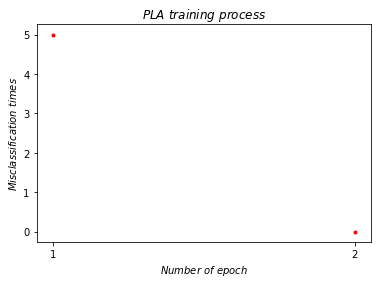

In [11]:
% matplotlib inline
import matplotlib.pyplot as pyplot

epoch = PLA.epoch 
err_history = PLA.error_history

epoch_arr = np.arange(1, epoch + 1, dtype = int)
plt.scatter(epoch_arr, err_history, c = 'r', marker = '.')
plt.xticks(epoch_arr)
plt.ylabel("$Misclassification\ times$")
plt.xlabel("$Number\ of\ epoch$")
plt.title("$PLA\ training\ process$")
plt.show()

In [12]:
def plot_decision_boundary(data, x_var, y_var, target_variable):
    
    sub_data = data[[x_var, y_var, target_variable]]

    target_class = sub_data[target_variable]

    x_min, x_max = sub_data[x_var].min(), sub_data[x_var].max()
    y_min, y_max = sub_data[y_var].min(), sub_data[y_var].max()

    xx, yy = np.meshgrid(np.linspace(x_min - 1, x_max + 1 , num = 100), np.linspace(y_min - 1, y_max + 1 , num = 100))

    pair_data = np.c_[xx.ravel(), yy.ravel()]
    
    PLA = Perceptron()
    PLA.training(x = sub_data[[x_var, y_var]].as_matrix(), y = sub_data[target_variable].values, max_iter = 1000)
    zz = PLA.predict(testing_x = pair_data)

    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap = plt.cm.Pastel2)
    plt.contour(xx, yy, zz, linewidths = 0.5, colors = 'black') # plot_line

    zz = zz.reshape(xx.shape)

    for target in set(target_class):
        plot_x = sub_data[(sub_data[target_variable] == target)][x_var]
        plot_y = sub_data[(sub_data[target_variable] == target)][y_var]
        plt.scatter(x = plot_x, y = plot_y, color = ['g', 'r', 'b'][int(target)], label = target)

    plt.title("PLA Decision Boundary")
    plt.legend()
    plt.xlabel(x_var)
    plt.ylabel(y_var)
    plt.show()

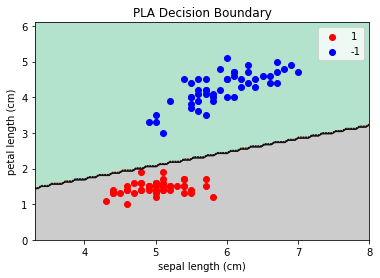

In [13]:
plot_decision_boundary(data = final_iris, x_var= "sepal length (cm)", y_var = "petal length (cm)",
                       target_variable = "target_class")

### Visualize fitting process.

In [14]:
def animate_process(sub_data, x_var, y_var):
    # change matplotlib plot kernel
    % matplotlib notebook 
    % matplotlib notebook
    import matplotlib.animation as animation
    import matplotlib.pyplot as plt

    text_font = {'family': 'serif', 'style': 'italic', 'color': 'black', 'weight': 'normal', 'size': 12}

    fig, ax = plt.subplots()

    num = 0
    for target in set(sub_data['target_names']):
        x = sub_data[sub_data['target_names'] == target][sub_data.columns[0]]
        y = sub_data[sub_data['target_names'] == target][sub_data.columns[1]]
        plt.scatter(x, y, color = ['r', 'g'][num], label = target)
        num += 1

    plt.xlabel(sub_data.columns[0])
    plt.ylabel(sub_data.columns[1])
    plt.title(s = 'Fitting Process')
    plt.legend(bbox_to_anchor=(0.75, 1.16), loc = 2, borderaxespad = 0.) # adjust legend position
    plt.show()

    x_min, x_max = np.amin(sub_data[x_var], axis = 0), np.amax(sub_data[x_var], axis = 0)
    plot_x = np.linspace(x_min -1 , x_max + 1, num = 50)
    line, = ax.plot([], [], c = 'black')
    fun_text = ax.text(x = x_min + 0.5, y = np.amax(sub_data[y_var]), s = '', fontdict = text_font)

    def init():
        fun_text.set_text("")
        line.set_data([], [])

        return fun_text, line

    def animate(i):
        bias, w = PLA.training_history[i][0], PLA.training_history[i][1:]
        fun_text.set_text(s = ('y = %0.2fx + %0.2f' % (-(w[0]/w[1]), -(bias/w[1]))))
        plot_y = -(w[0]/w[1])*plot_x-(bias/w[1])
        line.set_data(plot_x, plot_y)

        return fun_text, line


    ani = animation.FuncAnimation(fig = fig, init_func = init,func = animate, frames = len(PLA.training_history),
                                  interval = 100, blit = True)
    return ani

<IPython.core.display.Javascript object>


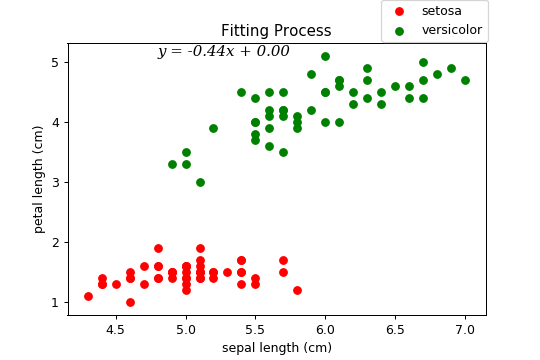

In [15]:
animate_process(sub_data = subset_iris, x_var = 'sepal length (cm)', y_var = 'petal length (cm)')

### Choose other variable

In [16]:
target_class = {
    'setosa': 1,
    "versicolor":-1
}

subset_iris = select_data(data = iris_data, variable = ['sepal length (cm)', 'sepal width (cm)'],
                         class_set = ['setosa', 'versicolor'], target_class = target_class)

#### When we use  `sepal length (cm)` and `sepal width (cm)` as a variable, the two class can't be separated by a straight line.

<IPython.core.display.Javascript object>


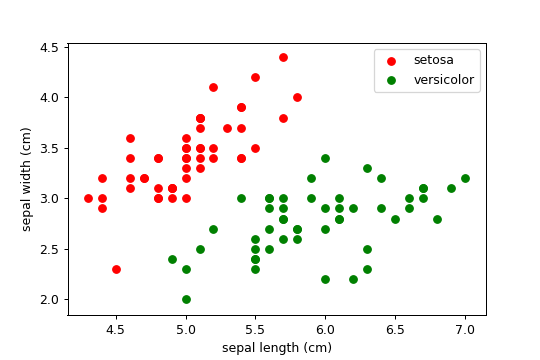

In [17]:
vis_data(data = subset_iris, x_var = 'sepal length (cm)', y_var = 'sepal width (cm)')

In [18]:
final_iris = subset_iris.drop(labels = 'target_names', axis = 1)
# data split
split_data = data_split(data = final_iris, split_ratio = 0.8, rand_seed = 123, target_variable = "target_class")
training_x, training_y = split_data['training']['x'], split_data['training']['y']
testing_x, testing_y = split_data['testing']['x'], split_data['testing']['y']

PLA = Perceptron()
PLA.training(x = training_x, y = training_y, max_iter = 1000)
pred = PLA.predict(testing_x = testing_x)
PLA.accuracy(prediction = pred, testing_y = testing_y) 

Accuracy : 1.00


1.0

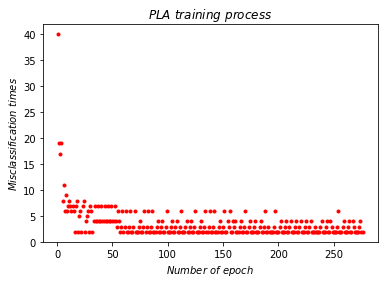

In [19]:
% matplotlib inline
import matplotlib.pyplot as pyplot

epoch = PLA.epoch 
err_history = PLA.error_history

epoch_arr = np.arange(1, epoch + 1, dtype = int)
plt.scatter(epoch_arr, err_history, c = 'r', marker = '.')
#plt.xticks(epoch_arr)
plt.ylabel("$Misclassification\ times$")
plt.xlabel("$Number\ of\ epoch$")
plt.title("$PLA\ training\ process$")
plt.show()

### If you don't set the `max_iter`, the PLA can 't stop.

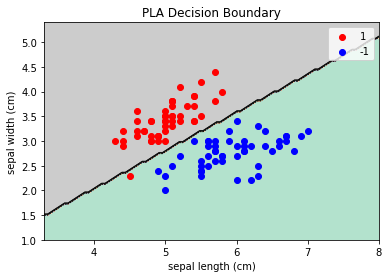

In [20]:
plot_decision_boundary(data = final_iris, x_var= "sepal length (cm)", y_var = "sepal width (cm)",
                       target_variable = "target_class")

<IPython.core.display.Javascript object>


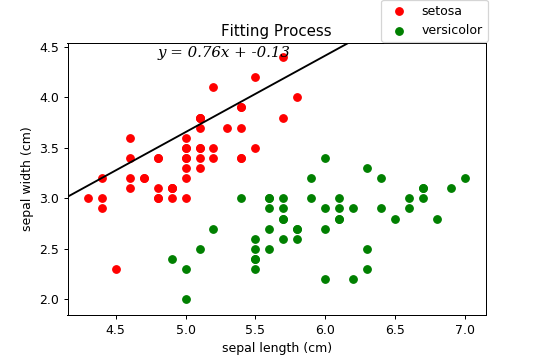

In [21]:
animate_process(sub_data = subset_iris, x_var = 'sepal length (cm)', y_var = "sepal width (cm)")

### Sklearn Perceptron Learning Algorithm

In [22]:
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [23]:
sklearn_PLA = Perceptron(max_iter= 1000, fit_intercept = True)
sklearn_PLA.fit(X = training_x, y = training_y)
pred = sklearn_PLA.predict(X = testing_x)

In [24]:
print("accruacy: {0:.2f}%".format(accuracy_score(y_true = testing_y, y_pred = pred)*100))

accruacy: 100.00%


Text(0,0.5,'petal length (cm)')

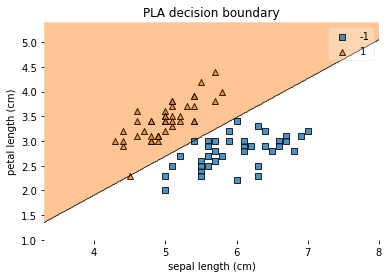

In [25]:
%matplotlib inline

plot_decision_regions(X = training_x, y = training_y, clf = sklearn_PLA)

plt.title('PLA decision boundary')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')

### Reference:
 - [NTU 2017 Machine Learning Foundations Hsuan-Tien Lin](https://www.csie.ntu.edu.tw/~htlin/course/mlfound17fall/)
 - [sklearn Perceptron Learning Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
 - [資料分析&機器學習 第3.2講：線性分類-感知器(Perceptron) 介紹](https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-2%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E6%84%9F%E7%9F%A5%E5%99%A8-perceptron-%E4%BB%8B%E7%B4%B9-84d8b809f866)